In [233]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns  

In [234]:
df = pd.read_json("all_results.json", orient='index')
df.shape

(8000, 7)

In [235]:
df_list = []
for idx,maze in enumerate(df.Maze.unique()):
    df_list.append((df[(df.Maze == maze)],maze))

## Maze01

,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_100,100.0,200.82,6.757532,184.0,200.0,205.00,212.00,216.0
HEURISTIC_70,100.0,123.63,8.614827,112.0,122.0,128.00,142.05,148.0
HEURISTIC_80,100.0,142.16,6.866284,129.0,141.0,146.25,154.05,165.0
HEURISTIC_90,100.0,167.39,6.545713,154.0,167.0,172.00,178.00,186.0
HEURISTIC_GOALS,100.0,95.05,21.496241,43.0,93.5,110.25,131.25,152.0
SHORT_100,100.0,197.09,5.918802,180.0,198.0,201.00,206.00,209.0
SHORT_70,100.0,139.55,24.691787,109.0,129.0,161.25,180.45,199.0
SHORT_80,100.0,153.40,18.673700,125.0,147.5,167.50,186.05,201.0
SHORT_90,100.0,165.26,9.909306,151.0,163.0,170.00,183.05,198.0


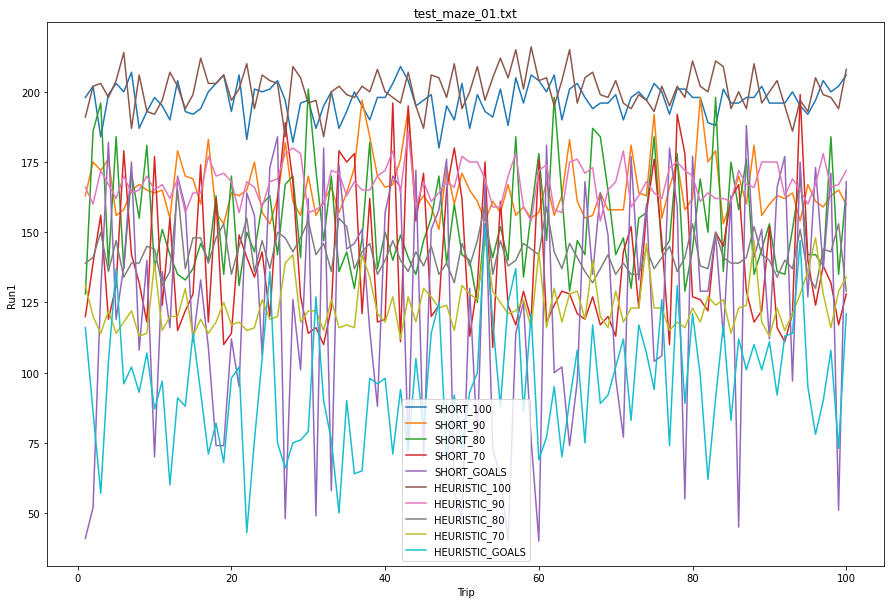

In [243]:
select = 0
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75, 0.95])


,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_100,100.0,17.00,0.000000,17.0,17.0,17.0,17.00,17.0
HEURISTIC_70,100.0,18.75,1.131505,17.0,19.0,19.0,20.00,23.0
HEURISTIC_80,100.0,18.12,0.945804,17.0,18.0,19.0,19.00,20.0
HEURISTIC_90,100.0,17.38,0.721670,17.0,17.0,17.0,19.00,19.0
HEURISTIC_GOALS,100.0,19.65,1.689988,17.0,20.0,21.0,22.05,24.0
SHORT_100,100.0,17.00,0.000000,17.0,17.0,17.0,17.00,17.0
SHORT_70,100.0,17.68,0.993718,17.0,17.0,19.0,19.00,21.0
SHORT_80,100.0,17.35,0.715979,17.0,17.0,17.0,19.00,19.0
SHORT_90,100.0,17.14,0.492776,17.0,17.0,17.0,19.00,19.0


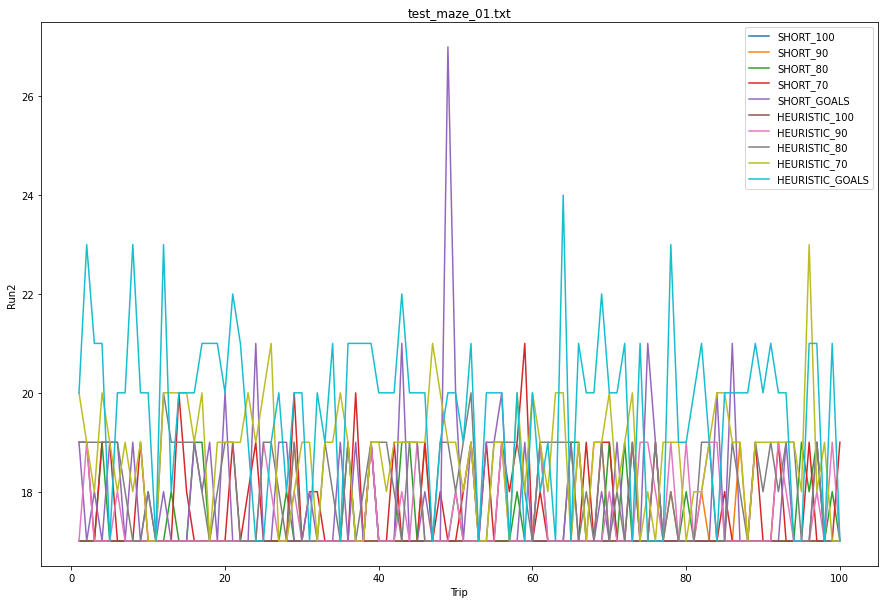

In [245]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_100,100.0,23.6940,0.225523,23.13,23.670,23.8300,24.0700,24.20
HEURISTIC_70,100.0,22.8708,1.096126,20.83,22.930,23.2400,24.3320,27.93
HEURISTIC_80,100.0,22.8586,0.972233,21.30,22.900,23.6775,24.0015,24.90
HEURISTIC_90,100.0,22.9593,0.772773,22.13,22.670,22.9775,24.6035,24.83
HEURISTIC_GOALS,100.0,22.8187,1.537641,19.33,23.050,23.7400,25.0865,27.37
SHORT_100,100.0,23.5697,0.198242,23.00,23.600,23.7000,23.8700,23.97
SHORT_70,100.0,22.3318,0.999700,20.67,22.400,23.0000,23.9035,24.97
SHORT_80,100.0,22.4630,0.769155,21.17,22.430,23.1300,23.7300,23.90
SHORT_90,100.0,22.6489,0.558577,22.03,22.470,22.7700,24.1715,24.47


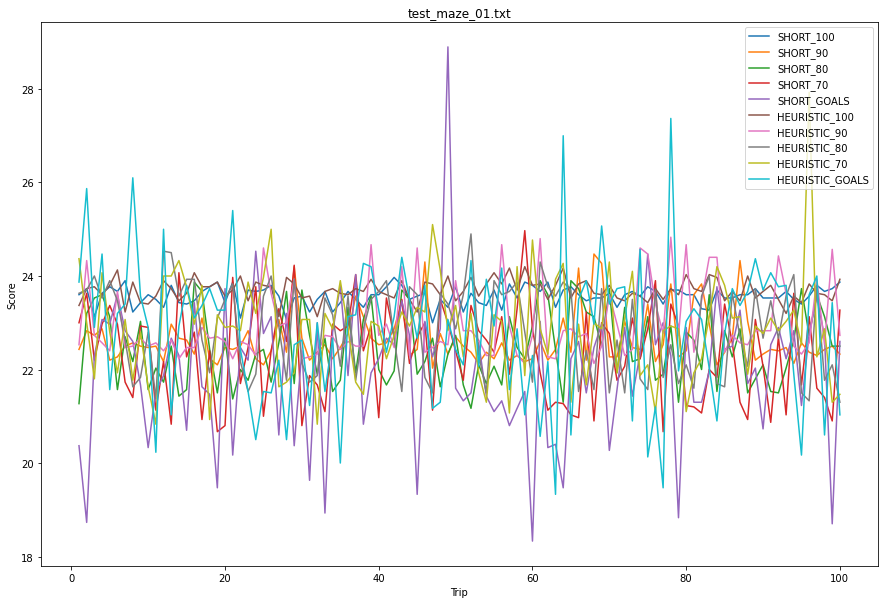

In [247]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Score", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Score.describe(percentiles=[0.75, 0.95])

,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_GOALS,100.0,58.158,10.876703,31.2,59.00,65.3,75.735,81.9
SHORT_GOALS,100.0,72.710,21.678568,25.7,79.55,93.1,96.500,97.2


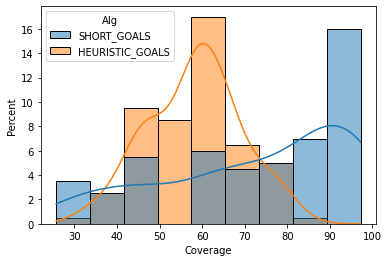

In [239]:
data = df_sel[df_sel.Alg.isin(['SHORT_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

,count,mean,std,min,50%,75%,95%,max
Alg,,,,,,,,
HEURISTIC_GOALS,100.0,19.65,1.689988,17.0,20.0,21.0,22.05,24.0
SHORT_GOALS,100.0,17.85,1.472818,17.0,17.0,19.0,20.05,27.0


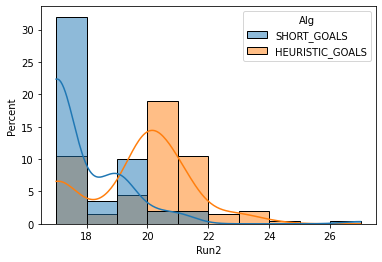

In [240]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

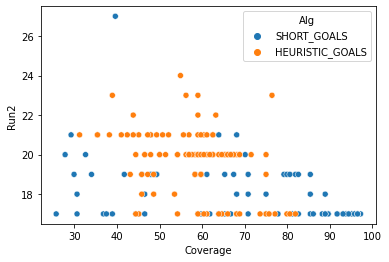

In [241]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

## Maze 02

In [ ]:
select = 1
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75])


In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75])

In [ ]:
data = df_sel[df_sel.Alg.isin(['RANDOM_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

## Maze03

In [ ]:
select = 2
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75])


In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75])

In [ ]:
data = df_sel[df_sel.Alg.isin(['RANDOM_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

## Maze03

In [ ]:
select = 2
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75])


In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75])

In [ ]:
data = df_sel[df_sel.Alg.isin(['RANDOM_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

## Maze04

In [ ]:
select = 3
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75])


In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75])

In [ ]:
data = df_sel[df_sel.Alg.isin(['RANDOM_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

## Maze05

In [ ]:
select = 4
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75])


In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75])

In [ ]:
data = df_sel[df_sel.Alg.isin(['RANDOM_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

## Maze06

In [ ]:
select = 5
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75])


In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75])

In [ ]:
data = df_sel[df_sel.Alg.isin(['RANDOM_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

## Maze07

In [ ]:
select = 6
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75])


In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75])

In [ ]:
data = df_sel[df_sel.Alg.isin(['RANDOM_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")

## Maze08

In [ ]:
select = 7
df_sel, maze_sel = df_list[select]

plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run1", hue="Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'lower center')

df_sel.groupby(['Alg']).Run1.describe(percentiles=[0.75])


In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Trip", y="Run2", hue= "Alg",
             data=df_sel).set_title(maze_sel)
plt.legend(loc = 'upper right')

df_sel.groupby(['Alg']).Run2.describe(percentiles=[0.75])

In [ ]:
data = df_sel[df_sel.Alg.isin(['RANDOM_GOALS', 'HEURISTIC_GOALS'])]
sns.histplot(data=data, x="Coverage", stat="percent",hue="Alg", kde=True)
data.groupby(['Alg']).Coverage.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.histplot(data=data, x="Run2", stat="percent", hue="Alg", kde=True)
data.groupby(['Alg']).Run2.describe(percentiles=[0.75, 0.95])

In [ ]:
sns.scatterplot(data=data, x="Coverage", y="Run2", hue="Alg")